In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#size - in pixels, size of motion blur
#angel - in degrees, direction of motion blur
def apply_motion_blur(image, size, angle):
    k = np.zeros((size, size), dtype=np.float32)
    k[ (size-1)// 2 , :] = np.ones(size, dtype=np.float32)
    k = cv2.warpAffine(k, cv2.getRotationMatrix2D( (size / 2 -0.5 , size / 2 -0.5 ) , angle, 1.0), (size, size) )  
    k = k * ( 1.0 / np.sum(k) )        
    return cv2.filter2D(image, -1, k)

In [3]:
img_pth = r"F:\dataset_processed_v0\dataset_processed\images\train\image_3864.png"

img = cv2.imread(img_pth)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur_img_0 = apply_motion_blur(img, 18, 45)
blur_img_180 = apply_motion_blur(img, 30, 180)
blur_img_360 = apply_motion_blur(img, 30, 360)

(0.0, 1.0, 0.0, 1.0)

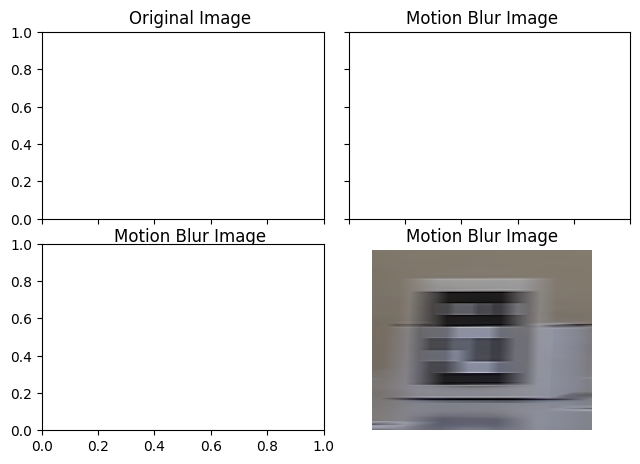

In [4]:
# subplots
from mpl_toolkits.axes_grid1 import Grid
fig, ax = plt.subplots(2, 2)

grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

# original image
ax[0, 0].imshow(img[420:560, 280:450, :])
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# motion blur image
ax[0, 1].imshow(blur_img_0[420:560, 280:450, :])
ax[0, 1].set_title('Motion Blur Image')
ax[0, 1].axis('off')

# motion blur image
ax[1, 0].imshow(blur_img_180[420:560, 280:450, :])
ax[1, 0].set_title('Motion Blur Image')
ax[1, 0].axis('off')

# motion blur image
ax[1, 1].imshow(blur_img_360[420:560, 280:450, :])
ax[1, 1].set_title('Motion Blur Image')
ax[1, 1].axis('off')



# plt.imshow(img[420:560, 280:450, :])
# axes off
plt.tight_layout()
plt.axis('off')

In [5]:
blur_parameters = [4, 6, 8, 10]
angle_parameters = [0, 30, 60, 90, 120, 150, 180]

(-0.5, 169.5, 139.5, -0.5)

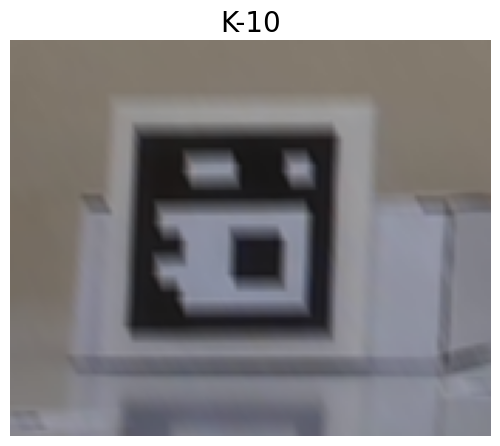

In [16]:
plt.imshow(apply_motion_blur(img, blur_parameters[2], angle_parameters[4])[420:560, 280:450, :])
plt.title('K-10', fontsize=20)
plt.tight_layout()
plt.axis('off')

(-0.5, 169.5, 139.5, -0.5)

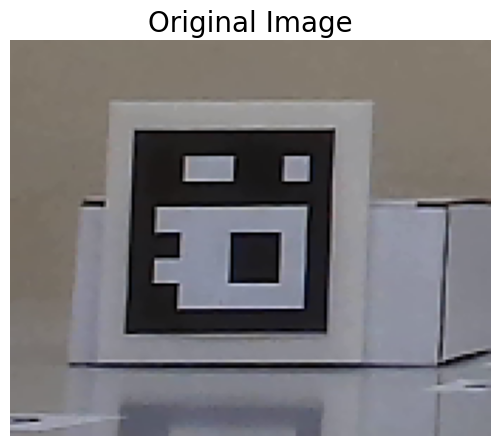

In [7]:
plt.imshow(img[420:560, 280:450, :])
plt.title('Original Image', fontsize=20)
plt.tight_layout()
plt.axis('off')

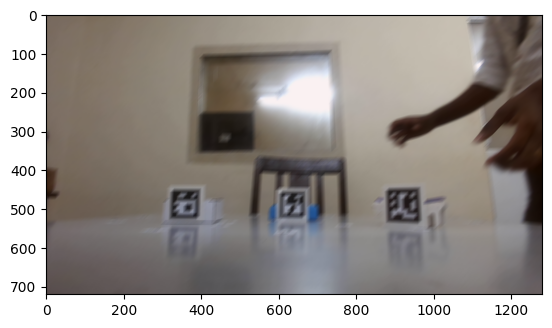

In [8]:
plt.imshow(blur_img_0)